   Id                                           Model  Price  Age_08_04  \
0   1   TOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors  13500         23   
1   2   TOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors  13750         23   
2   3   TOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors  13950         24   
3   4   TOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors  14950         26   
4   5     TOYOTA Corolla 2.0 D4D HATCHB SOL 2/3-Doors  13750         30   

   Mfg_Month  Mfg_Year     KM Fuel_Type  HP  Met_Color  ... Central_Lock  \
0         10      2002  46986    Diesel  90          1  ...            1   
1         10      2002  72937    Diesel  90          1  ...            1   
2          9      2002  41711    Diesel  90          1  ...            0   
3          7      2002  48000    Diesel  90          0  ...            0   
4          3      2002  38500    Diesel  90          0  ...            1   

   Powered_Windows  Power_Steering  Radio  Mistlamps  Sport_Model  \
0                1     

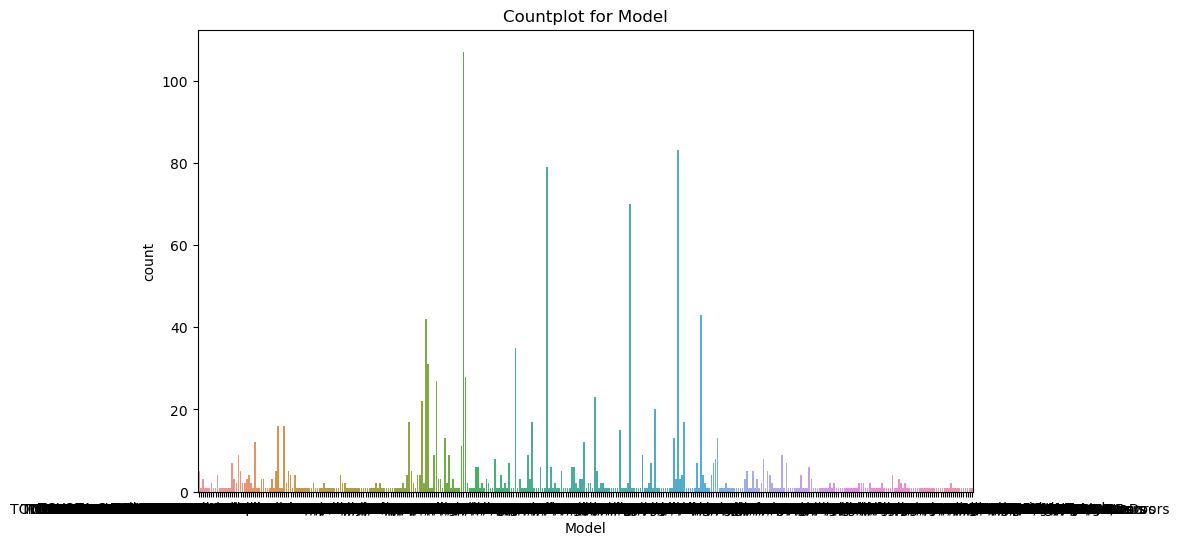

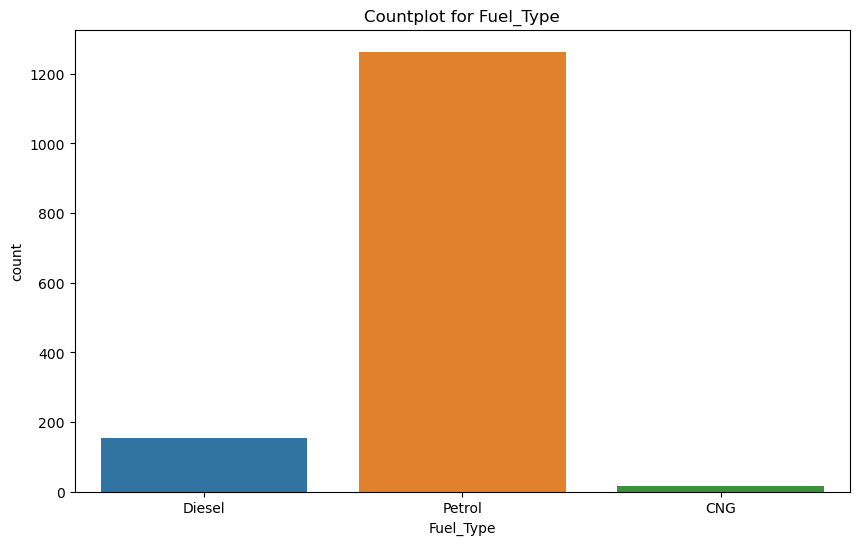

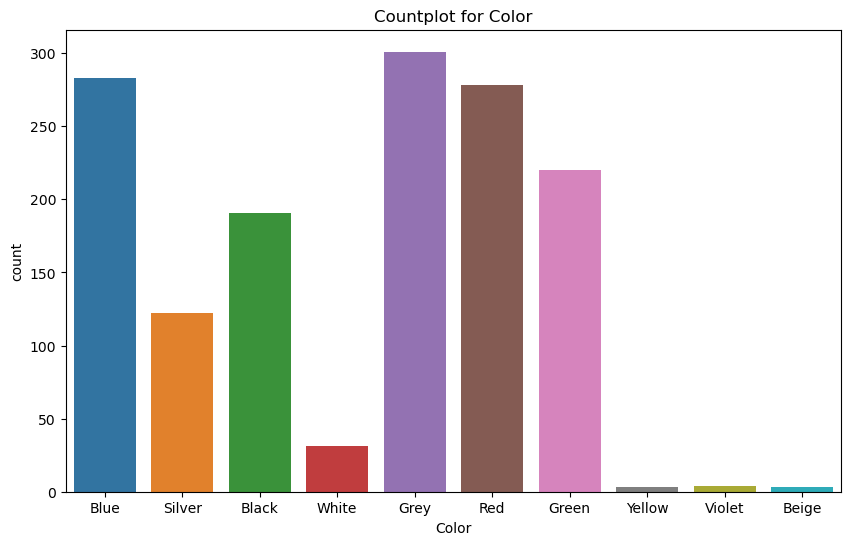

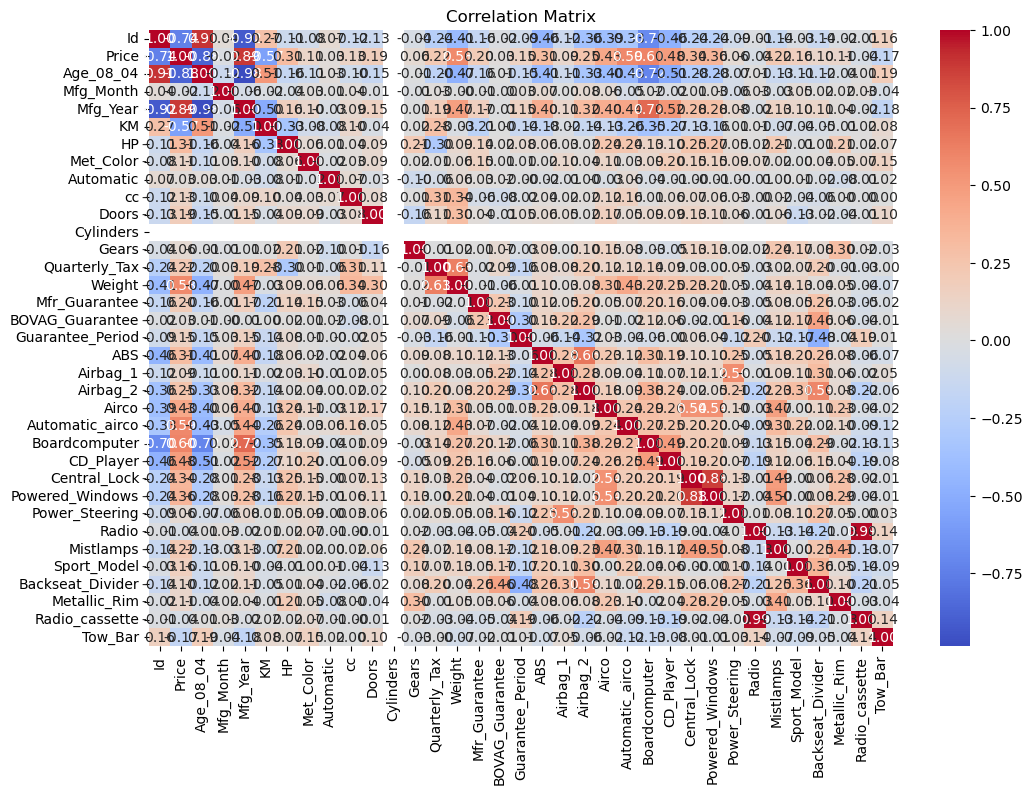

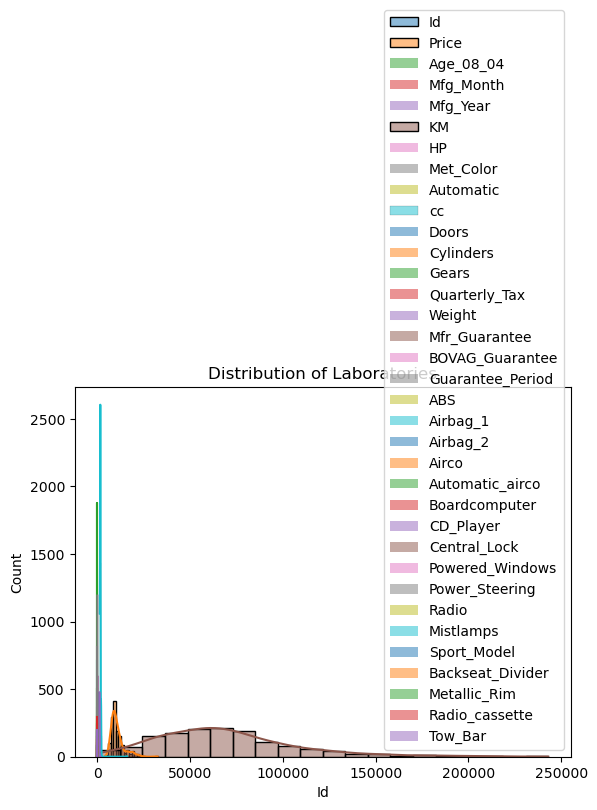

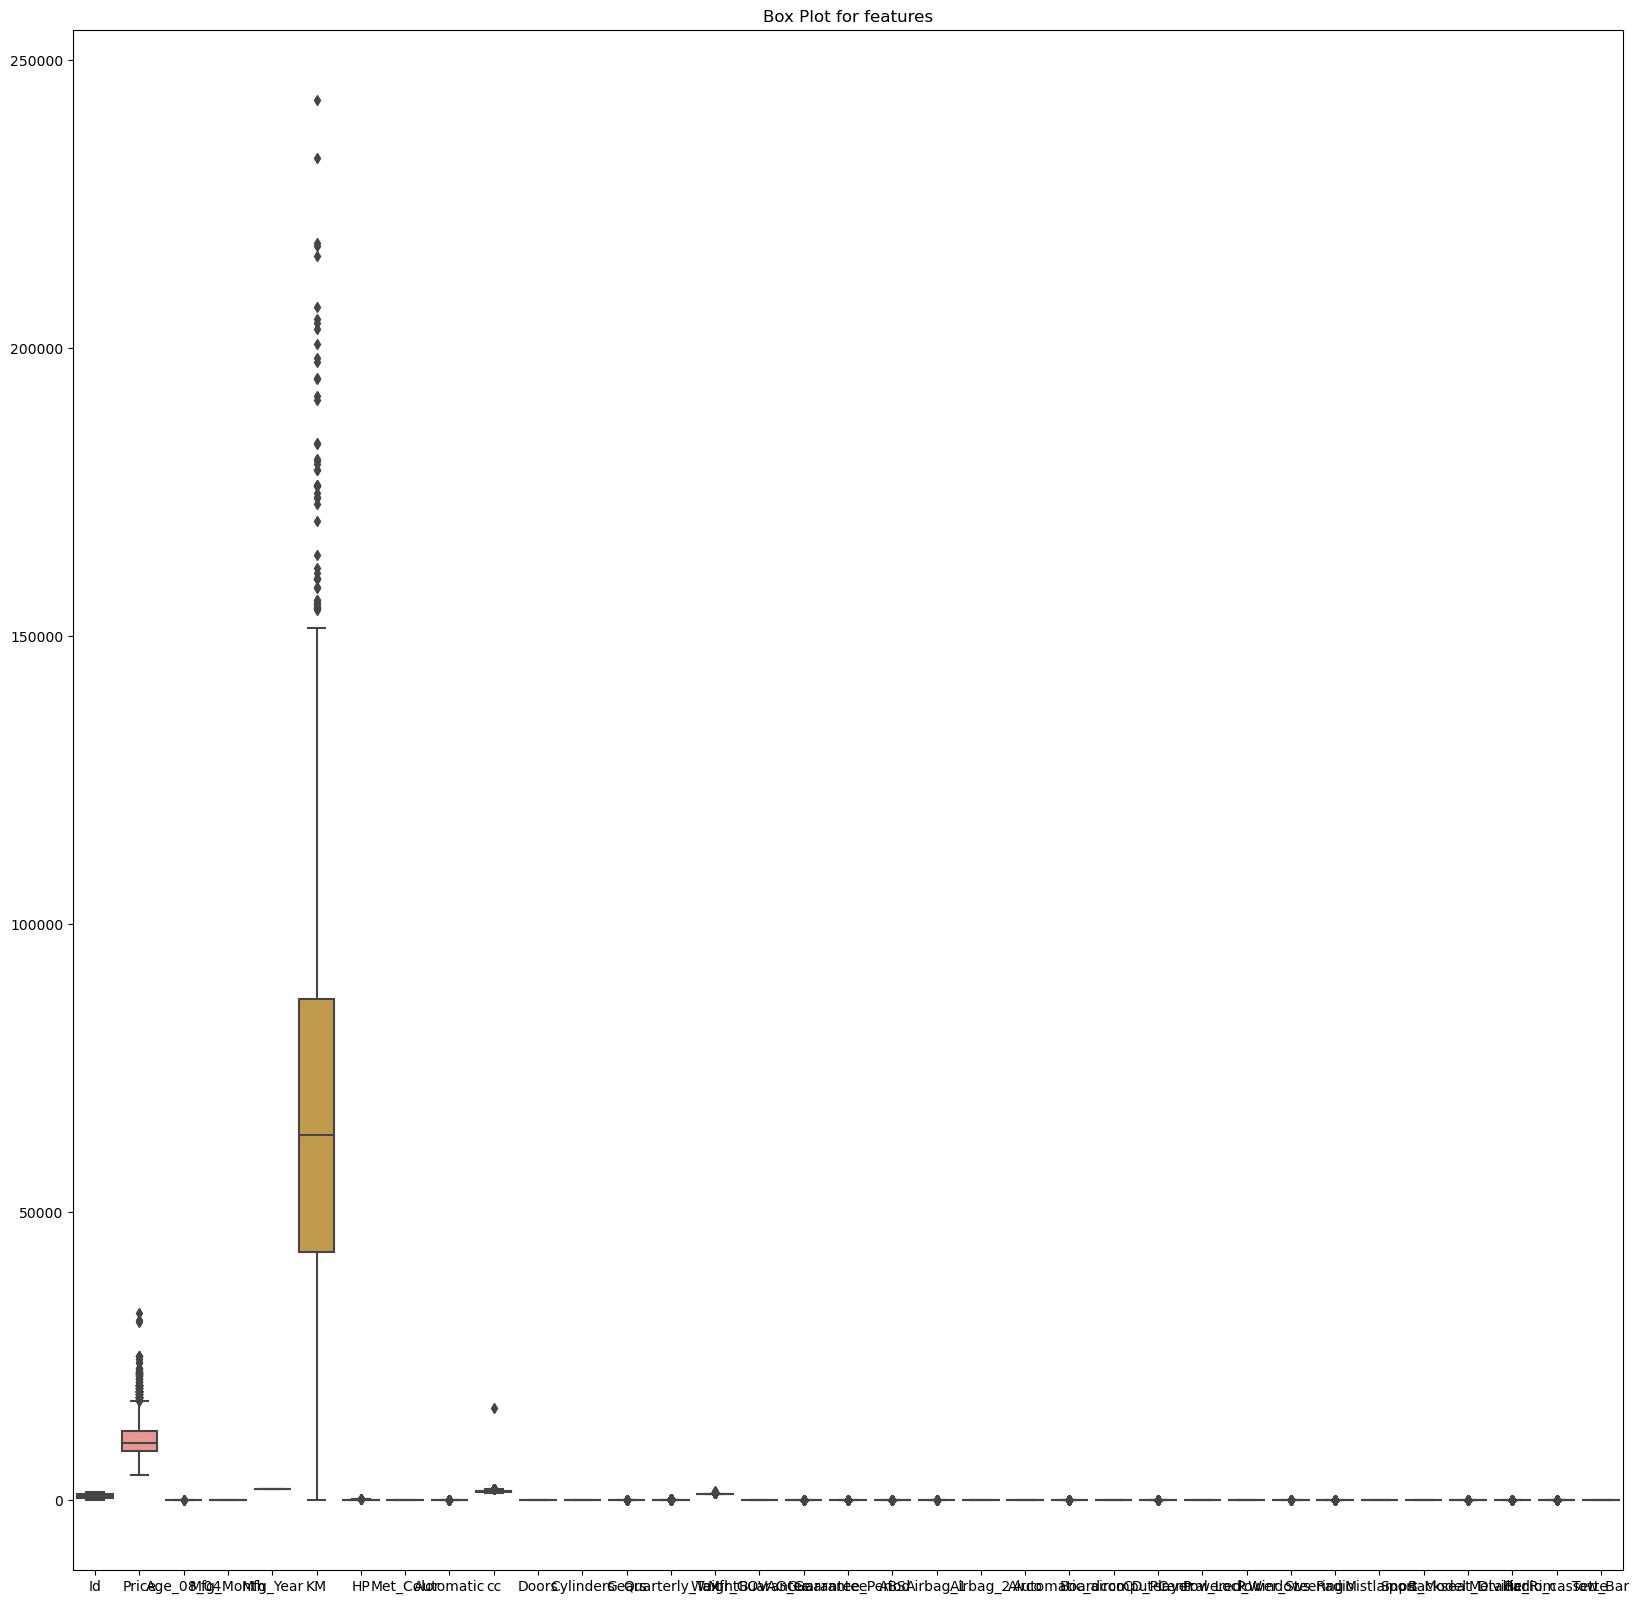

Imputed outliers for Price with mean:
      Id                                              Model  Price  Age_08_04  \
7      8      TOYOTA Corolla 2.0 D4D 90 3DR TERRA 2/3-Doors  18600         30   
8      9        TOYOTA Corolla 1800 T SPORT VVT I 2/3-Doors  21500         27   
10    11  TOYOTA Corolla 1.8 VVTL-i T-Sport 3-Drs 2/3-Doors  20950         25   
11    12  TOYOTA Corolla 1.8 16V VVTLI 3DR T SPORT BNS 2...  19950         22   
12    13  TOYOTA Corolla 1.8 16V VVTLI 3DR T SPORT 2/3-D...  19600         25   
..   ...                                                ...    ...        ...   
182  184         TOYOTA Corolla 1.4 16V 5DR TERRA 4/5-Doors  21125          2   
183  185     TOYOTA Corolla 1.6 16V VVT I 5DR SOL 4/5-Doors  21500          2   
184  186   TOYOTA Corolla 1.4-16v VVT-i Linea Terra Comf...  17795          1   
185  187  TOYOTA Corolla 1.6-16v VVT-i Linea Terra Comfo...  18245          1   
523  526        TOYOTA Corolla 1.6 HB LINEA TERRA 2/3-Doors  18950     

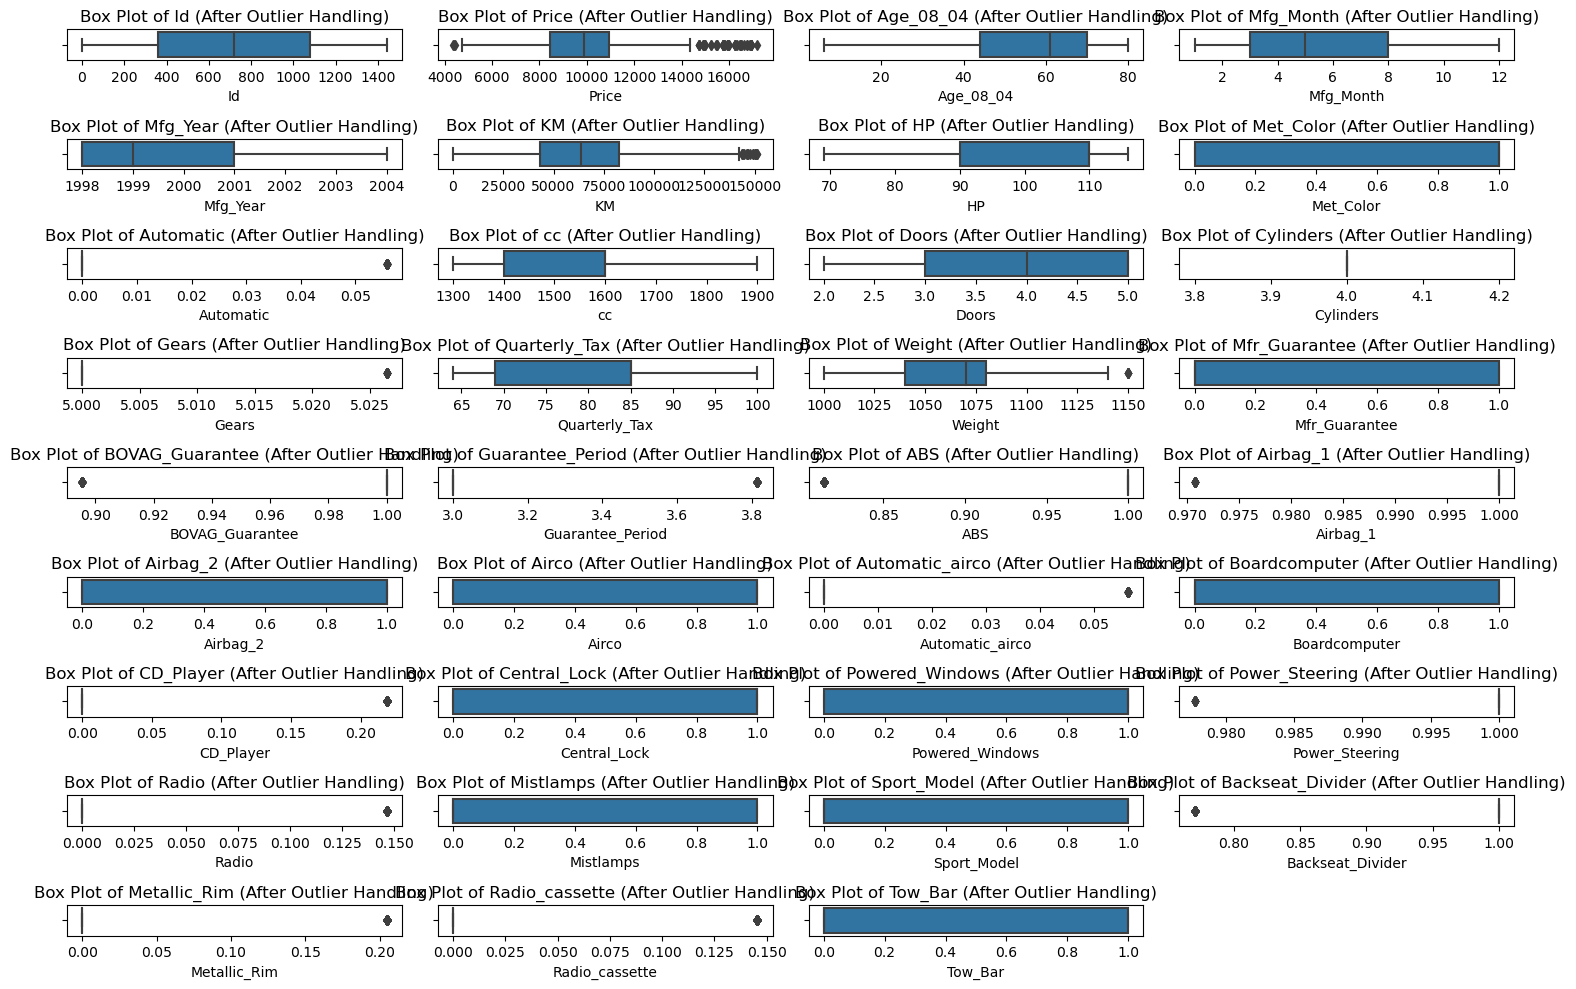

Average training error (RMSE): 0.656
Average test error (RMSE): 0.664
R square: 0.567
    Model  R-squared
0       1   0.567279
1       2   0.567279
2       3   0.567279
3       4   0.567279
4       5   0.567279
..    ...        ...
94     95   0.567279
95     96   0.567279
96     97   0.567279
97     98   0.567279
98     99   0.567279

[99 rows x 2 columns]


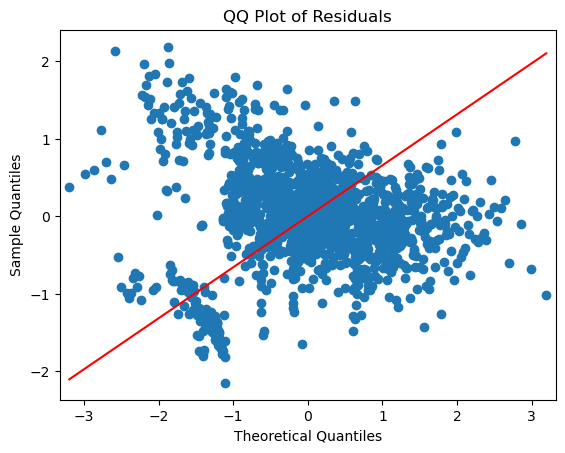

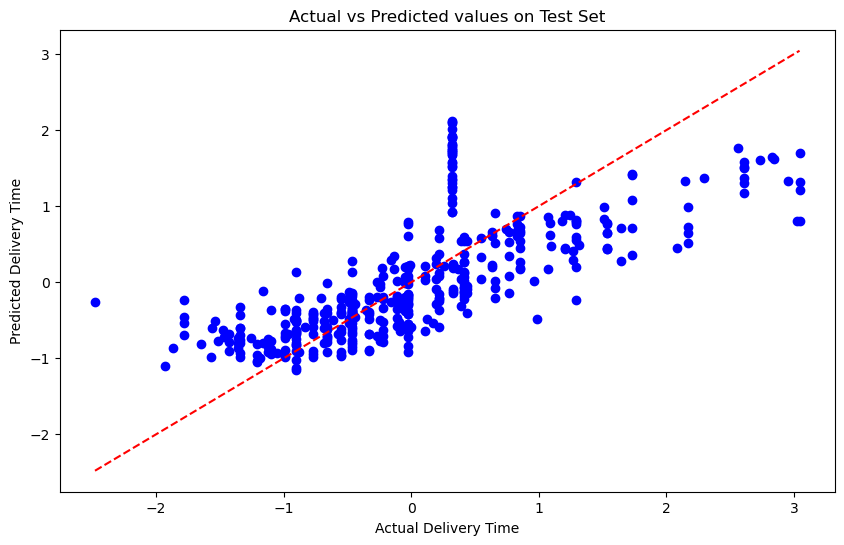

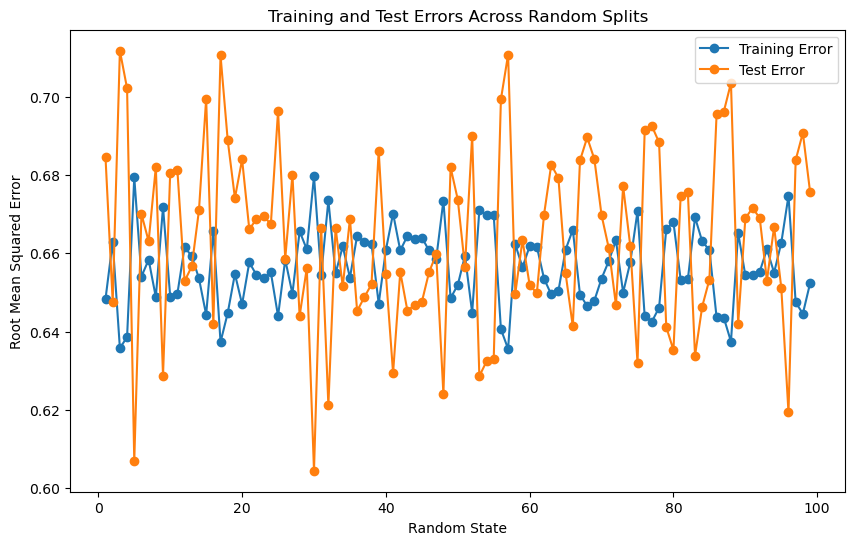

In [3]:

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score


df = pd.read_csv("D:\\assignments\ToyotaCorolla.csv", encoding='latin1')
list(df)


print(df.head())
print(df.describe())
print(df.info())
df.isnull().sum()


numerical_columns = df.select_dtypes(include=['int', 'float']).columns
categorical_columns = df.select_dtypes(include=['object']).columns


for column in df[categorical_columns].columns:
    plt.figure(figsize=(10, 6))
    sns.countplot(x=column, data=df)
    plt.title(f"Countplot for {column}")
    plt.show()


correlation_matrix = df[numerical_columns].corr()
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix')
plt.show()


for column in df[numerical_columns].columns:
    sns.histplot(df[column], kde=True, bins=20, label=column)
plt.title('Distribution of Laboratories')
plt.legend()
plt.show()


plt.figure(figsize=(20, 20))
sns.boxplot(data=df[numerical_columns])
plt.title('Box Plot for features')
plt.show()


outlier_threshold = 1.5
for column in df[numerical_columns].columns:
    q1 = df[column].quantile(0.25)
    q3 = df[column].quantile(0.75)
    iqr = q3 - q1
    lower_bound = q1 - outlier_threshold * iqr
    upper_bound = q3 + outlier_threshold * iqr
    
    outliers = df[(df[column] < lower_bound) | (df[column] > upper_bound)]
    
    
    if not outliers.empty:
        df.loc[(df[column] < lower_bound) | (df[column] > upper_bound), column] = df[column].mean()

       
        print(f"Imputed outliers for {column} with mean:")
        print(outliers)
        print("\n")


plt.figure(figsize=(15, 10))
for i, col in enumerate(numerical_columns, 1):
    plt.subplot(9, 4, i)
    sns.boxplot(x=col, data=df)
    plt.title(f'Box Plot of {col} (After Outlier Handling)')
plt.tight_layout()
plt.show()



Y = df[["Price"]]
X = df[["Age_08_04", "KM", "HP", "cc", "Doors", "Gears", "Quarterly_Tax", "Weight"]]


SS = StandardScaler()
SS_X = SS.fit_transform(X)
SS_Y = SS.fit_transform(Y) 


training_errors = []
test_errors = []


for i in range(1, 100):
    X_train, X_test, Y_train, Y_test = train_test_split(SS_X, SS_Y, test_size=0.30, random_state=i)

    
    LR = LinearRegression()
    LR.fit(X_train, Y_train)

    
    Y_pred_train = LR.predict(X_train)
    Y_pred_test = LR.predict(X_test)

  
    training_errors.append(np.sqrt(mean_squared_error(Y_train, Y_pred_train)))
    test_errors.append(np.sqrt(mean_squared_error(Y_test, Y_pred_test)))


print("Average training error (RMSE):", np.mean(training_errors).round(3))
print("Average test error (RMSE):", np.mean(test_errors).round(3))


LR.fit(SS_X, SS_Y)
Y_pred = LR.predict(SS_X)


r2 = r2_score(SS_Y, Y_pred)
print("R square:", r2.round(3))

r2 = pd.DataFrame({'Model': range(1, 100), 'R-squared': r2})
print(r2)



residuals = SS_Y - Y_pred
import statsmodels.api as sm
sm.qqplot(residuals, line='s')
plt.title('QQ Plot of Residuals')
plt.show()

plt.figure(figsize=(10, 6))
plt.scatter(Y_test, Y_pred_test, color='blue')
plt.plot([min(Y_test), max(Y_test)], [min(Y_test), max(Y_test)], linestyle='--', color='red')
plt.title('Actual vs Predicted values on Test Set')
plt.xlabel('Actual Delivery Time')
plt.ylabel('Predicted Delivery Time')
plt.show()


plt.figure(figsize=(10, 6))
plt.plot(range(1, 100), training_errors, label='Training Error', marker='o')
plt.plot(range(1, 100), test_errors, label='Test Error', marker='o')
plt.xlabel('Random State')
plt.ylabel('Root Mean Squared Error')
plt.title('Training and Test Errors Across Random Splits')
plt.legend()
plt.show()

